## Data Visualization Assignment 2: Sarah Darlyna Bt Mohd Radzi (0134768)

### Question: What are the main factor to diabetes and how does it relates to other attributes that can cause diabetes? 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import norm, skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/Users/sarahdarlyna/Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 8 columns with 768 rows

## 1. PRE-PROCESSING

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This shows summary statistics, including the mean and median and measures of distribution such as standard deviation.

Pregnancies appear in a realistic range from 0 to 17. 
Other attributes in the data (Glucose, BloodPressure, SkinThickness, Insulin, BMI) include the
value 0, which is not possible in practice and need to be corrected. 
The 'DiabetesPedigreeFunction' is a function that scores the probability of diabetes based on
family history, with a realistic range of 0.078 to 2.42. 
Age has a realistic range from 21 to 81. 
The target variable Outcome, 0 represents cases with no diabetes, and 1 represents cases with diabetes.

### Checking for numerical variables column with 0

In [5]:
 0 in df.values

True

In [6]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [7]:
nan_columns = df.isna().any()

# Display the columns with NaN values
columns_with_nan = nan_columns[nan_columns].index.tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


### Replace missing value with mean

In [8]:
df['Glucose'].fillna((df['Glucose'].mean()), inplace=True)
df['BloodPressure'].fillna((df['BloodPressure'].mean()), inplace=True)
df['SkinThickness'].fillna((df['SkinThickness'].mean()), inplace=True)
df['Insulin'].fillna((df['Insulin'].mean()), inplace=True)
df['BMI'].fillna((df['BMI'].mean()), inplace=True)

In [9]:
nan_columns = df.isna().any()

# Display the columns with NaN values
columns_with_nan = nan_columns[nan_columns].index.tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


Missing value has been replaced.

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Feature Importance based on correlation analysis and Random Forest Classifier algorithm

Text(0.5, 1.0, 'Correlation Graph of the Diabetes Dataset')

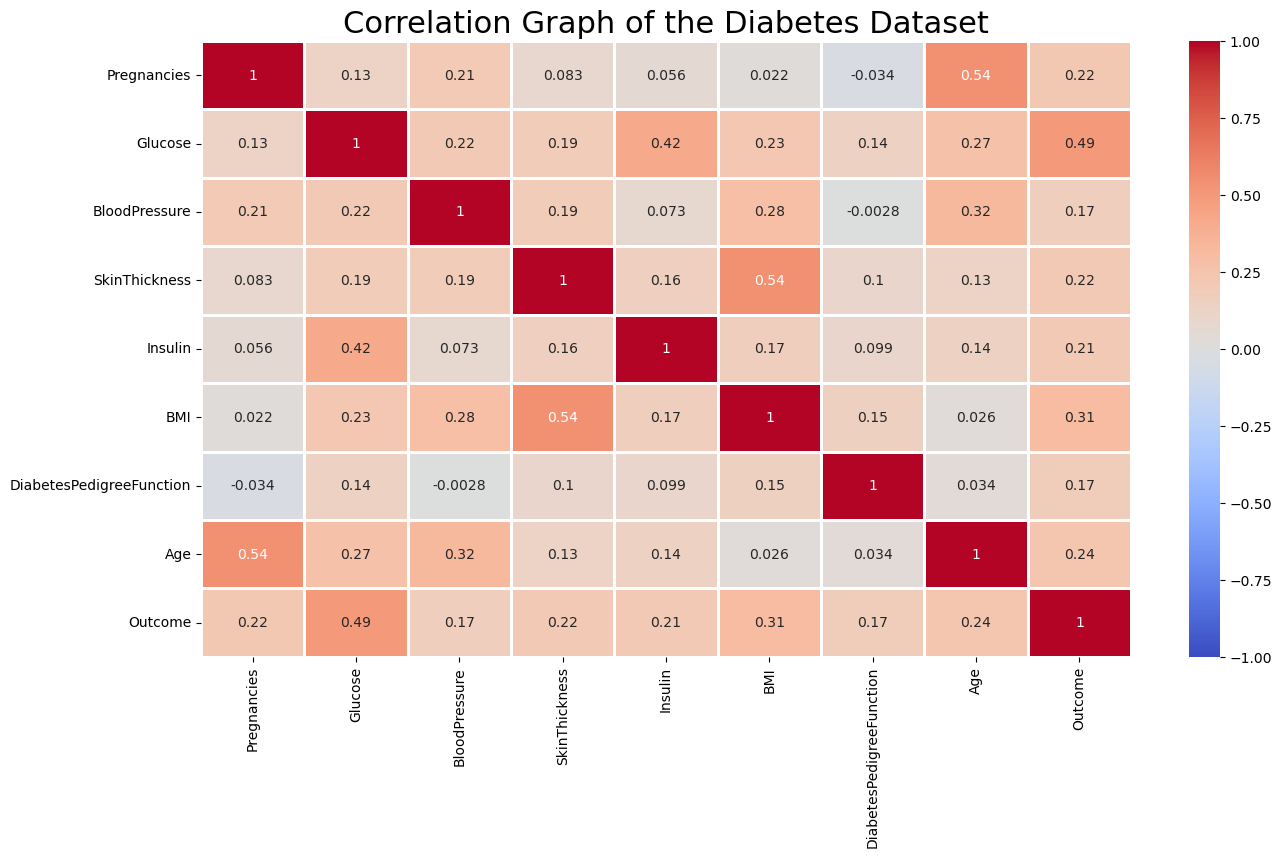

In [11]:
plt.figure(figsize = (15,8))
correlation = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 1, linecolor = 'white', cmap = 'coolwarm')
correlation.set_title('Correlation Graph of the Diabetes Dataset', fontdict = {'fontsize': 22})

Based on the correlation heatmap above, almost all attributes have weak linear correlations. This indicates that most attributes are more likely to have nonlinear relationships. Despite that, the highest correlation with diabetes outcome comes from Glucose with the score of 49%. Glucose is the best indicator of diabetes
outcome in this situation.

In [12]:
df_n = df.copy()
X_n = df_n.drop('Outcome', axis=1)
y_n = df_n['Outcome']


X_tr, X_te, y_tr, y_te = train_test_split(X_n,y_n, test_size=0.33,random_state=7)

rfc_f = RandomForestClassifier(n_estimators=200)
rfc_f.fit(X_tr, y_tr)

RandomForestClassifier(n_estimators=200)

In [13]:
rfc_f.feature_importances_

array([0.07154693, 0.25439279, 0.08390753, 0.08300882, 0.08919225,
       0.15445508, 0.13042502, 0.13307159])

<Axes: >

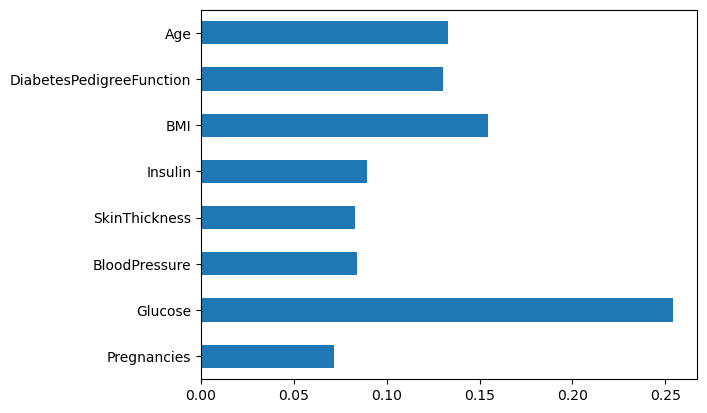

In [14]:
(pd.Series(rfc_f.feature_importances_, index=X_n.columns).plot(kind='barh'))

Based on the Random Forest Classification evaluation, it further illustrates that the best features is Glucose that scores more than 0.25 followed by BMI and Age. This concludes that Glucose is the main contributor for diabetes diagnosis. Hence, Glucose will be used along the dependable variable (Outcome) for the analysis.

## 3. Analysis

### Analysis 1: Distribution of diabetes 

In [15]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

Text(0.5, 1.0, 'Distribution of Diabetes')

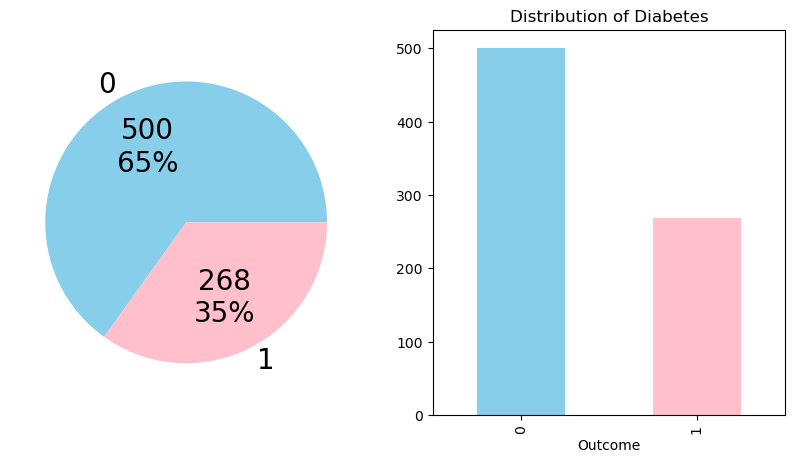

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

df.groupby('Outcome').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['skyblue','pink'], ax=ax1)

df.groupby('Outcome').size().plot(kind='bar',color=['skyblue', 'pink'], ax=ax2)
plt.title("Distribution of Diabetes")

The pie chart and bar chart above illustrates the distribution of diabetes cases in the dataset. The blue colour indicates cases with no diabetes while the pink colour indicates cases with diabetes. Overall, the distribution of cases lean more towards those with no diabetes(healthy) with a 30% difference. 

### Analysis 2: Glucose analysis

Diabetes occurs when your blood glucose, also called blood sugar, is too high.

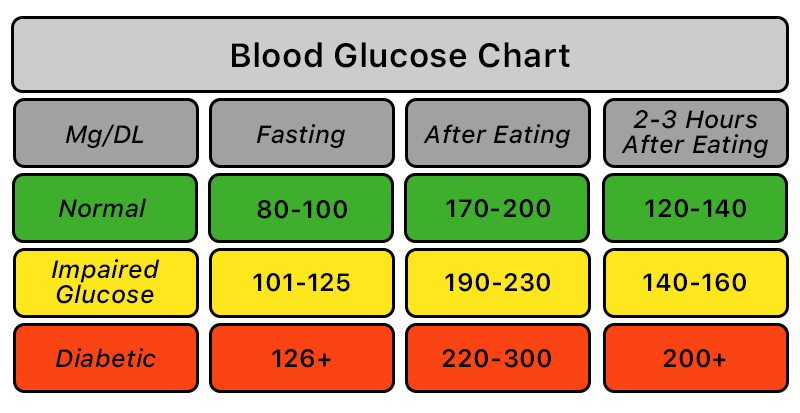

Text(0.5, 1.0, 'Distribution of Diabetes Based on Glucose Level')

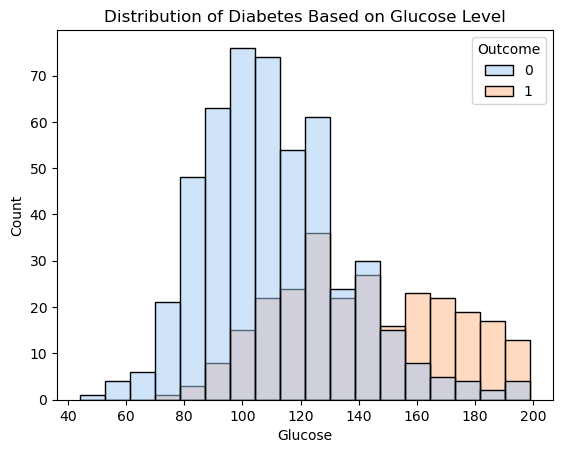

In [85]:
sns.histplot(data = df, x = 'Glucose', hue = 'Outcome', palette = 'pastel')
plt.title("Distribution of Diabetes Based on Glucose Level")

The histogram above explains the distribution of patient with diabetes and those with no diabetes based on the level of their blood glucose. The blue indicates case with no diabetes while the orange indicates case with diabetes. The distribution of cases with diabetes leans more towards higher glucose level as the peak for case with no diabetes is at glucose 100 while normally skewed to the left while case with diabetes peaks higher at glucose level 125 and are normally skewed to the right.

### Analysis 3: Insulin analysis

Insulin is a hormone that your pancreas makes to allow cells to use glucose.

Insulin helps control blood glucose levels by signaling the liver and muscle and fat cells to take in glucose from the blood.

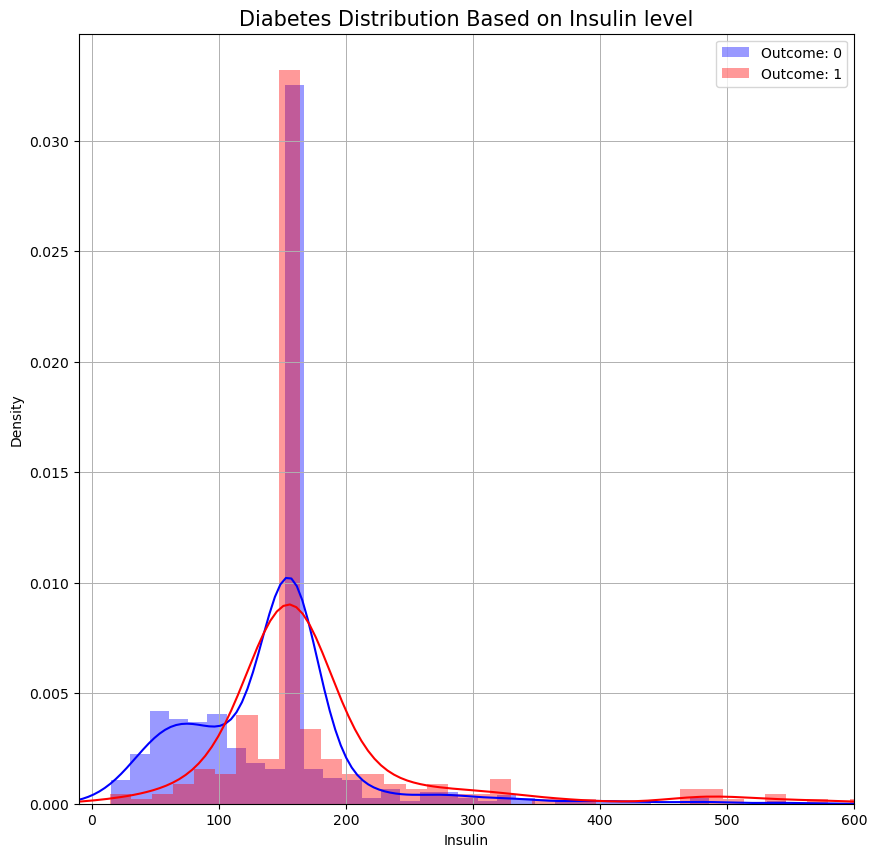

In [84]:
plt.figure(figsize=(10,10))

sns.distplot(df_cleaned[df_cleaned['Outcome'] == 0]["Insulin"], color='blue', label = 'Outcome: 0')
sns.distplot(df_cleaned[df_cleaned['Outcome'] == 1]["Insulin"], color='red', label = 'Outcome: 1')

plt.title('Diabetes Distribution Based on Insulin level', fontsize=15)
plt.xlim([-10,600])
plt.grid(linewidth = 0.7)
plt.legend()
plt.show()

The histogram above illustrates the distribution of cases concentrates on insulin level below 200. Cases with diabetes (red) can be observed with higher insulin while cases with no diabetes(blue) decreases with rising insulin level. This concludes that a higher insulin level may leads to a diabetes.

In [67]:
df_cleaned = df[df['Insulin'] != 0]

<Axes: xlabel='Glucose', ylabel='Insulin'>

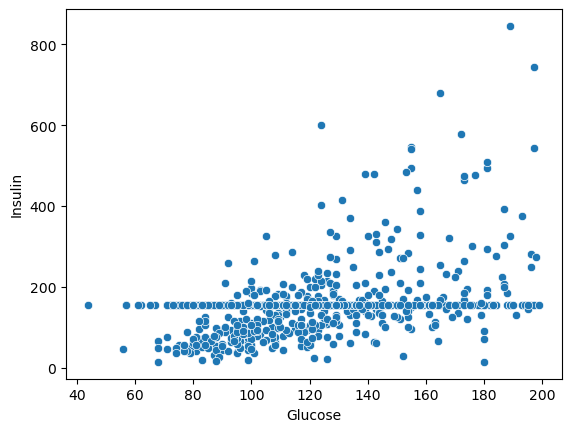

In [20]:
sns.scatterplot(data=df_cleaned, x='Glucose', y='Insulin')

Text(0.5, 1.0, 'Regplot of Glucose Level with Insulin Level')

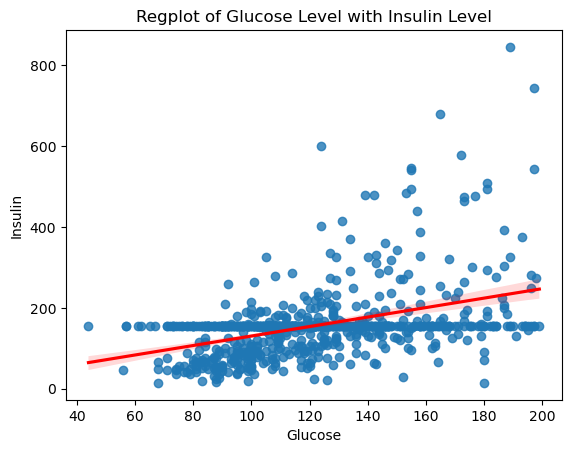

In [83]:
ax = sns.regplot(x="Glucose", y="Insulin", data=df_cleaned,line_kws=dict(color="r"))
plt.title("Regplot of Glucose Level with Insulin Level")

Based on the scatter plot above, there has been a positive correlation with the number of glucose and insulin. As the glucose level rises, so does the insulin level. 

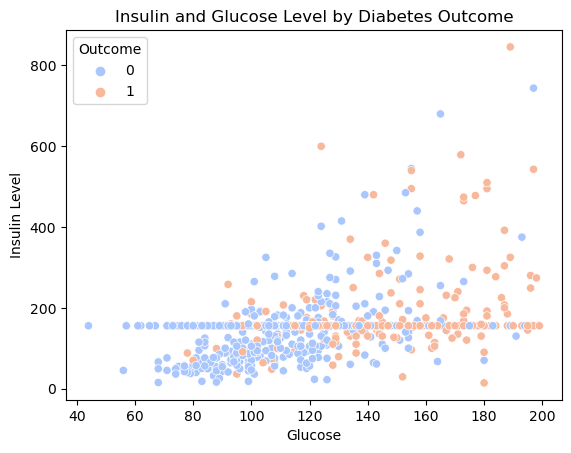

In [81]:
sns.scatterplot(data=df_cleaned, x='Glucose', y='Insulin', hue='Outcome', palette='coolwarm')

plt.xlabel('Glucose')
plt.ylabel('Insulin Level')
plt.title('Insulin and Glucose Level by Diabetes Outcome')

plt.show()

Further analysis of the scatter plot illustrates that cases with diabetes(orange) scatters more towards higher glucose and insulin leven compare to case with no diabetes(blue). To conclude, the level of glucose influence the level of insulin for diabetes diagnosis.

### Analysis 4: Blood Pressure analysis

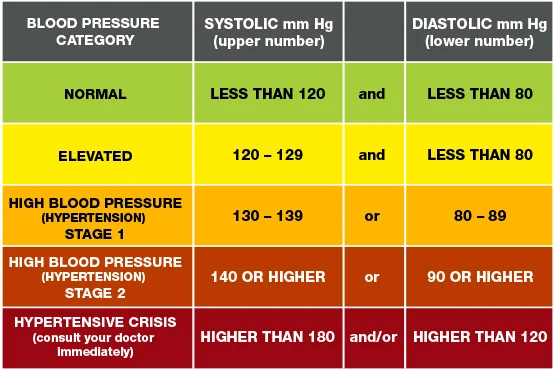

According to the American Heart Association, the normal range for blood pressure lies for those that lies less than 120m Hg for systolic and less than 80mm Hg for diastolic. Blood pressure that are above these ranges are considered abnormal and may cause diseases.

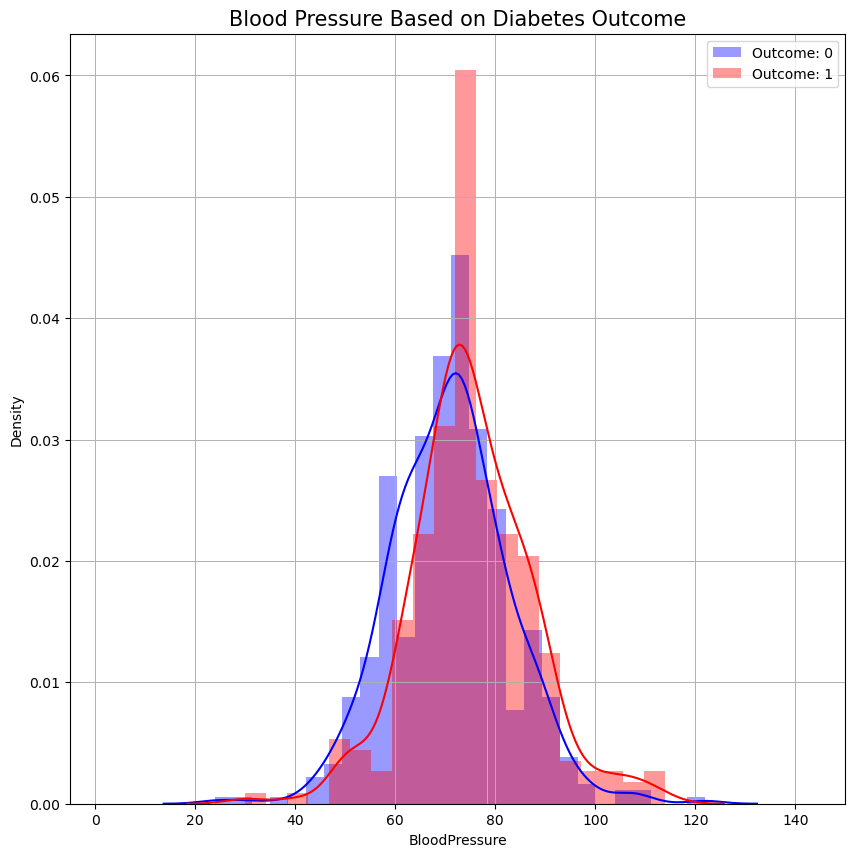

In [80]:
plt.figure(figsize=(10,10))

sns.distplot(df[df['Outcome'] == 0]["BloodPressure"], color='blue',label = 'Outcome: 0') 
sns.distplot(df[df['Outcome'] == 1]["BloodPressure"], color='red',label = 'Outcome: 1') 

plt.title('Blood Pressure Based on Diabetes Outcome', fontsize=15)
plt.xlim([-5,150])
plt.grid(linewidth = 0.7)
plt.legend()
plt.show()

Diabetes damages arteries and makes them targets for hardening, called atherosclerosis. That can cause high blood pressure.

From above graph, we can say that, diabetic and healthy cases are evenly distributed with low and normal BP but, there are less healthy cases who have high BP as it can be observed how diabetic cases leans more to the right where BP level rises.

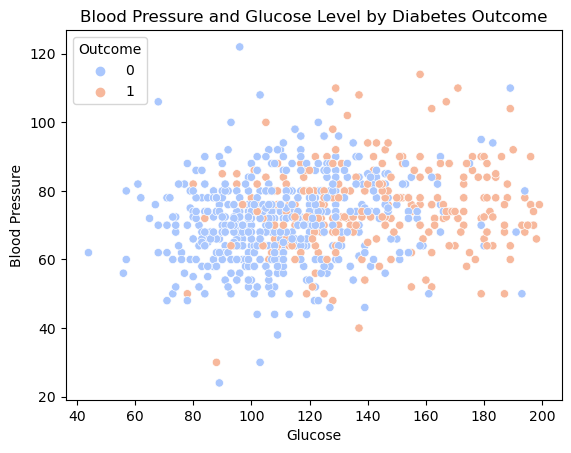

In [79]:
sns.scatterplot(data=df_cleaned, x='Glucose', y='BloodPressure', hue='Outcome', palette='coolwarm')

plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure and Glucose Level by Diabetes Outcome')

plt.show()

Further analysis of the scatter plot illustrates that cases with diabetes(orange) scatters more towards higher glucose. However, based on BP, there seem to have no significant differences which mean the relationship between glucose and BP might not have been strong.

### Analysis 5: Age

As the person ages, they are at high risk for the development of type 2 diabetes due to the combined effects of increasing insulin resistance and impaired pancreatic islet function with aging.

Text(0.5, 1.0, 'Distribution of Diabetes with Age')

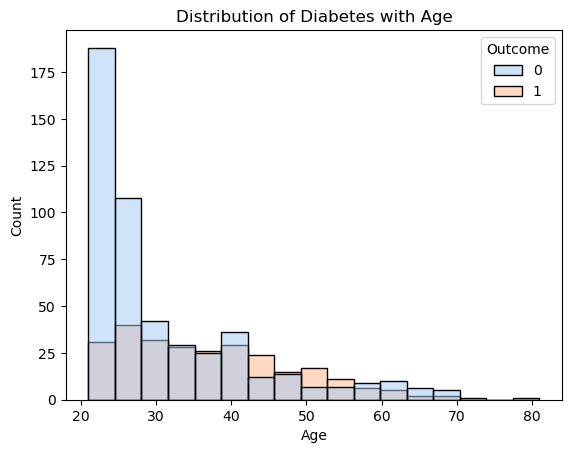

In [78]:
sns.histplot(data = df, x = 'Age', hue = 'Outcome', palette = 'pastel')
plt.title("Distribution of Diabetes with Age")

Based on the histogram above, cases with no diabetes (blue) concentrates on younger age while the distribution of cases with diabetes(orange) can still be observed in older age range.

Text(0.5, 1.0, 'Distribution of Diabetes with Age')

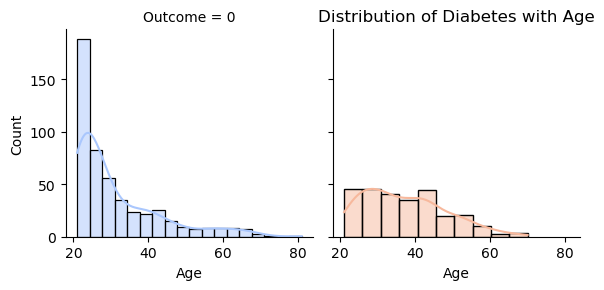

In [26]:
h = sns.FacetGrid(df, col='Outcome', hue='Outcome', palette='coolwarm')
h.map(sns.histplot, 'Age', kde=True)
plt.title("Distribution of Diabetes with Age")

Based on the histogram above, the cases with diabetes (orange) are more prone with older age compare to cases with no diabetes (blue) which plateaus with older age.

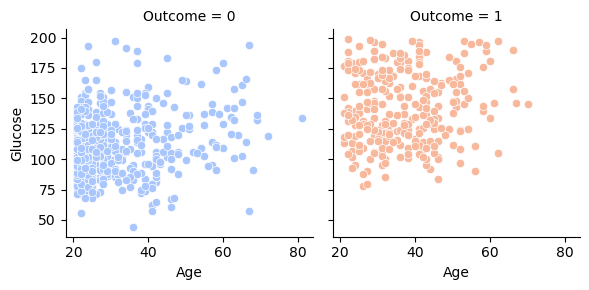

In [27]:
g = sns.FacetGrid(df, col='Outcome', hue='Outcome', palette='coolwarm')
g.map(sns.scatterplot, 'Age', 'Glucose')

Based on the scatter plot above, cases with diabetes(orange) mostly concentrates on the age of 20 to 60 years old with higher glucose level compare to cases with no diabetes(blue).

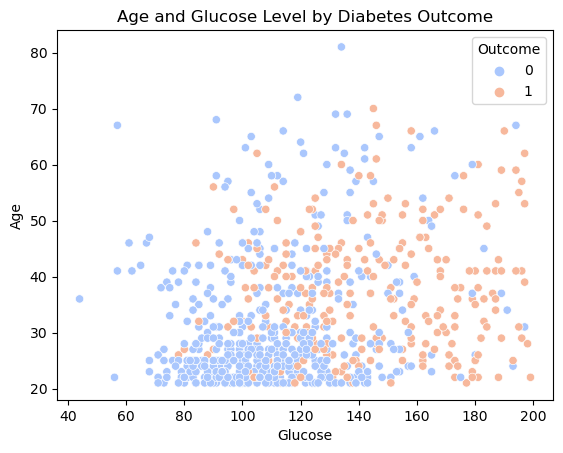

In [106]:
sns.scatterplot(data=df, x='Glucose', y='Age', hue='Outcome', palette='coolwarm')

plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Age and Glucose Level by Diabetes Outcome')

plt.show()


Further inspection of both scatter plots shows that there are more distribution for cases with diabetes(orange) with higher glucose for ages 30 and above with glucose range of 125-200 while cases with no diabetes(blue) strongly concentrates on normal glucose level with range of 75-125 for age 30 and below.

### Analysis 6: BMI Analysis

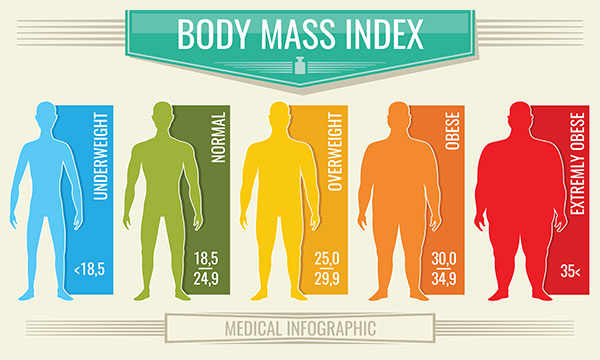

Body mass index (BMI) is a person’s weight in kilograms divided by the square of height in meters. 

Below 18.5	Underweight

18.5 – 24.9	Healthy Weight

25.0 – 29.9	Overweight

30.0 and Above	Obesity

Text(0.5, 1.0, 'Distribution of BMI on Diabetes Outcome')

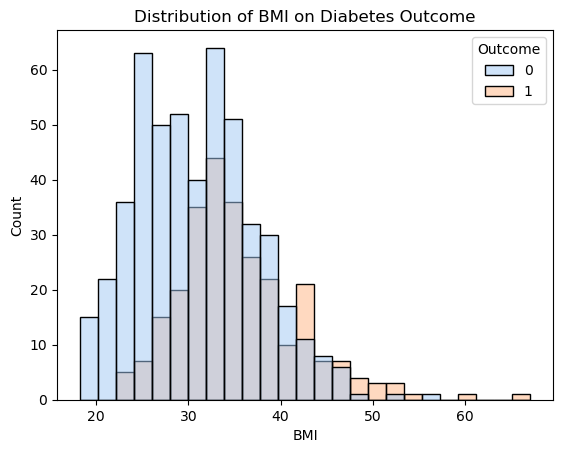

In [90]:
sns.histplot(data = df, x = 'BMI', hue = 'Outcome', palette = 'pastel', hue_order=[0,1])
plt.title("Distribution of BMI on Diabetes Outcome")

Based on the histogram above, the concentration of cases with no diabates(blue) skewed normally on the left which are on the range of average BMI (20-30) while cases with diabetes(orange) lies on a higher BMI count above 30. Based on the infographic above, 30 is in the range of obese hence, those with obesity have a higher chance for diabetes. 

Text(0.5, 1.0, 'Swarm Plot Comparison of BMI on Diabetes Outcome')

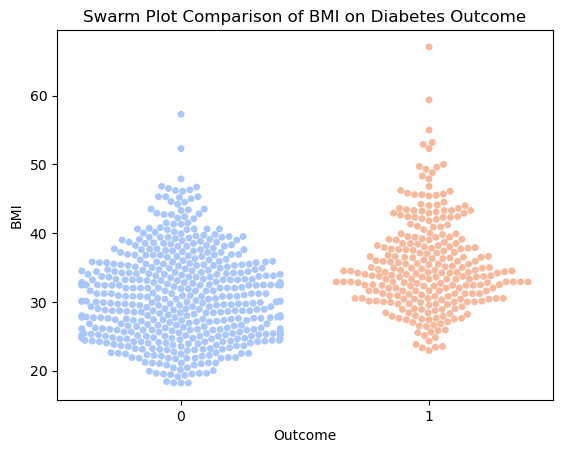

In [92]:
sns.swarmplot(data=df, x='Outcome', y='BMI', palette='coolwarm')
plt.title("Swarm Plot Comparison of BMI on Diabetes Outcome")

Based on the swarm graph above, there are more distribution of cases with no diabetes(blue) compare to cases with diabetes(orange). Furthermore, the distribution of cases with diabetes(orange) have the median BMI value of somewhere around 35 and above  and it’s equally distributed on both sides compare to cases with no diabetes(blue) which have the median BMI value of 30 equally. 

Text(0.5, 1.0, 'Violin plot with BMI Distribution With Diabetes Outcome')

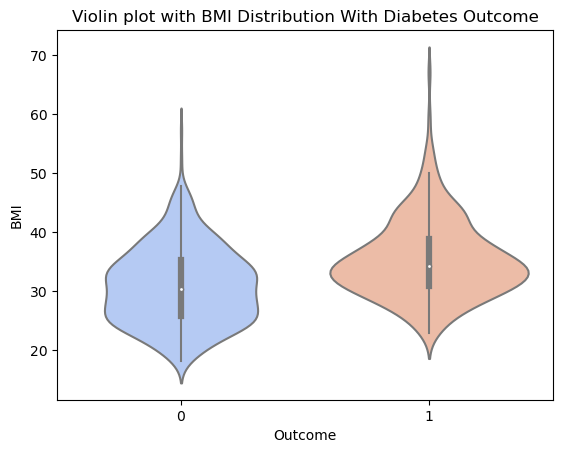

In [93]:
sns.violinplot(data=df, x='Outcome', y='BMI', palette='coolwarm', split=True)
plt.title("Violin plot with BMI Distribution With Diabetes Outcome")

Based on the violin plot above, the distribution of cases with diabetes(orange) are more concentrated on a higher BMI compare to cases with no diabetes (blue). The median BMI for cases with diabetes is at 35 while cases with no diabetes have a median BMI at 30. Not only that, the wider section of the plot represent a higher probability. The skinnier sections represent a lower probability. In this case, cases with diabetes are skinny on each end and wide in the middle. This means that cases with diabetes are highly concentrated on the median. On the other hand, cases with no diabetes have a slightly wider on lower end and the middle is less wider than cases with diabetes. It is not concentrated on the median value and are more concentrated on BMI value between 20-30 which are considered normal BMI range.

Hence, it can be concluded that cases with diabetes concentrates more on higher BMI value that are considered unhealthy based on the chart. Unhealthy high BMI value may contributes to a diabetes.

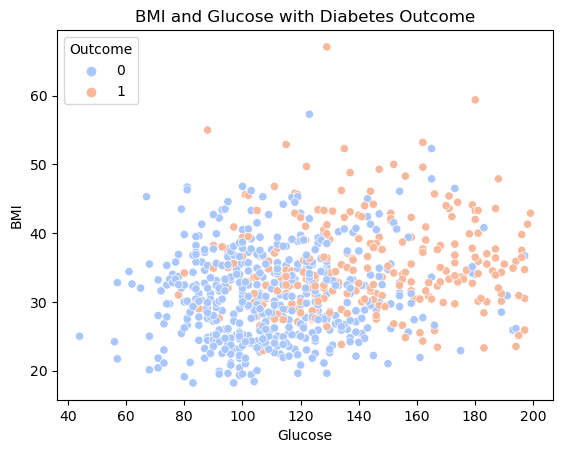

In [96]:
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='coolwarm')

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('BMI and Glucose with Diabetes Outcome')

# Show plot
plt.show()

Based on the scatter plot above, the distribution of cases with diabetes(orange) are more concentrated on a higher BMI and higher glucose compare to cases with no diabetes(blue).

### Analysis 7: DiabetesPedigreeFunction Analysis

Diabetes Pedigree Function indicates the function which scores likelihood of diabetes based on family history

Text(0.5, 1.0, 'Distribution of Diabetes Pedigree Function on Diabetes Outcome')

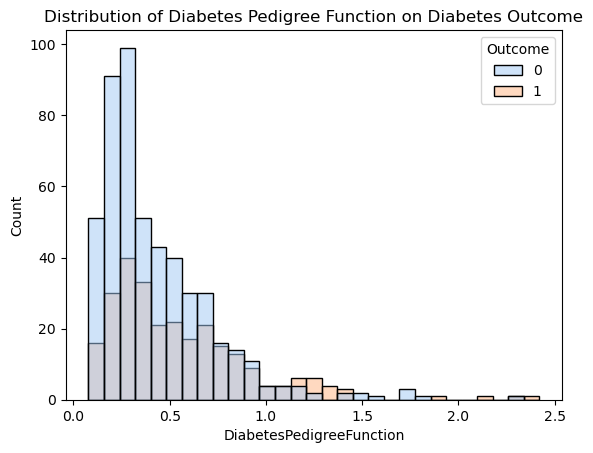

In [97]:
sns.histplot(data = df, x = 'DiabetesPedigreeFunction', hue = 'Outcome', palette = 'pastel', hue_order=[0,1])
plt.title("Distribution of Diabetes Pedigree Function on Diabetes Outcome")

Based on the histogram above, most of the cases concentrates on diabetes pedigree range of 0 to 1. The higher the diabetes pedigree, the more likely that the case has a family history of diabetes. From observation, cases with no diabetes(blue) decreases with increasing diabetes pedigree while cases with diabetes(orange) can still be observed with diabetes pedigree of 1 and above.

Hence, this indicates that chances of diabetes is higher to those with family history of diabetes.

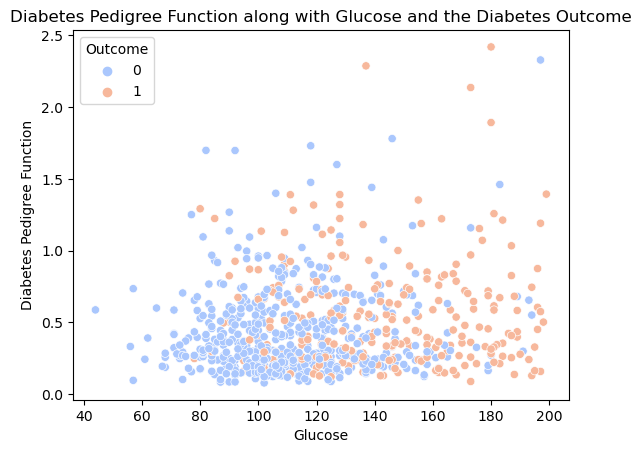

In [101]:
sns.scatterplot(data=df, x='Glucose', y='DiabetesPedigreeFunction', hue='Outcome', palette='coolwarm')

plt.xlabel('Glucose')
plt.ylabel('Diabetes Pedigree Function')
plt.title('Diabetes Pedigree Function along with Glucose and the Diabetes Outcome')

plt.show()


Based on the scatter plot above, the distribution of the cases concentrates on the range of 0.0 to 1.0 diabetes pedigree function. Despite that, it can be seen that the higher the glucose level, the more the cases with diabetes (orange) scattered to a higher diabetes pedigree function. 

The higher the diabetes pedigree function, the more likely that the case has a family history of diabetes. Hence, from above graph, as the function increase the diabetic cases increases, showing that the diabetes could be hereditary for that case.

### Analysis 8: Pregnancies Analysis

Text(0.5, 1.0, 'Number of Pregnancy with Diabetes')

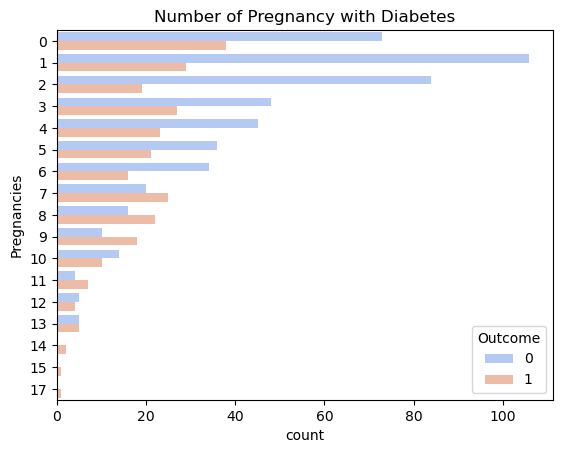

In [102]:
sns.countplot(y ='Pregnancies', hue = "Outcome", data = df, palette = 'coolwarm')
plt.title("Number of Pregnancy with Diabetes")

According to the countplot above, the cases of female patient with higher pregnancies count have higher chance on getting diabetes (orange) as it increases with more pregnancies count compare to cases of female with no diabetes (blue) which decreases as pregnancies number grows.

In [36]:
d1 = df[df.Outcome==1]
d0 = df[df.Outcome==0]

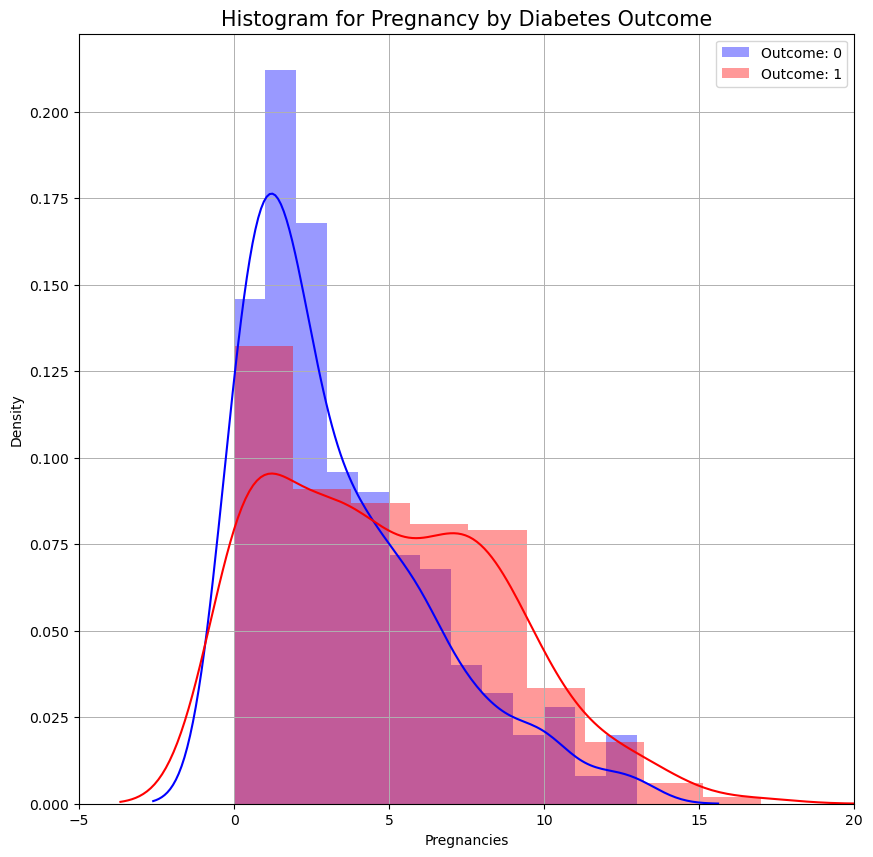

In [103]:
plt.figure(figsize=(10,10))

sns.distplot(df[df['Outcome'] == 0]["Pregnancies"], color='blue', label = 'Outcome: 0') # Healthy - green
sns.distplot(df[df['Outcome'] == 1]["Pregnancies"], color='red', label = 'Outcome: 1') # Diabetic - Red
plt.legend(['Outcome']) 

plt.title('Histogram for Pregnancy by Diabetes Outcome', fontsize=15)
plt.xlim([-5,20])
plt.grid(linewidth = 0.7)

plt.legend()

plt.show()

Visually, data is rightly skewed. A large proportion of the participants are zero count on pregnancy. As the data set includes women more than 21 years old, its likely that many are unmarried. When looking at the histograms, a hypothesis is that women are more likely to be diabetic with pregnancies.

Text(0.5, 1.0, 'Distribution of SkinThickness with glucose and Diabetes outcome')

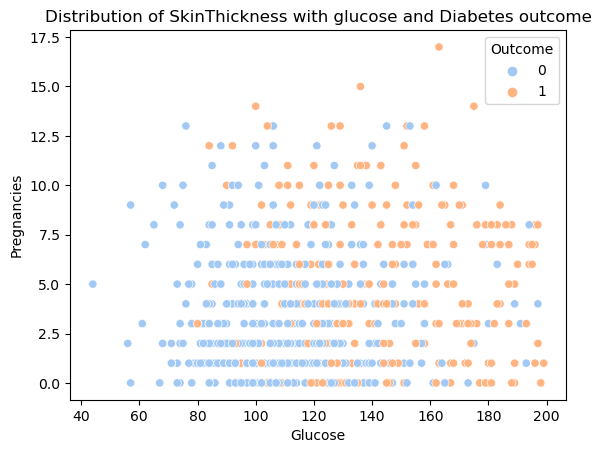

In [107]:
sns.scatterplot(data = df, x = 'Glucose', y='Pregnancies', hue = 'Outcome', palette = 'pastel')
plt.title("Distribution of SkinThickness with glucose and Diabetes outcome")

Based on the scatter plot above, there seem to have no clear distribution aside from the higher number of glucose are more likely to develop diabetes while the number of pregnancies remain similar for both cases. This would mean that the relationship between glucose and pregnancies may have not been significant.

### Analysis 9: Skin Thickness Analysis

Changes to the blood vessels because of diabetes can cause a skin condition called diabetic dermopathy. Dermopathy appears as scaly patches that are light brown or red, often on the front of the legs. This indicates skin is thicker than average. 

Based on the countplot above, the distribution of cases are in the range of 20-40 skin thickness with ~30 being the highest for both outcomes. Further observation shows that cases with diabetes (orange) tends to have thicker skin as it increases in frequency with skin thickness compare to cases with no diabetes(blue) which concentrates more on thinner and normal skin thickness as it descreases in frequency with thicker skin.

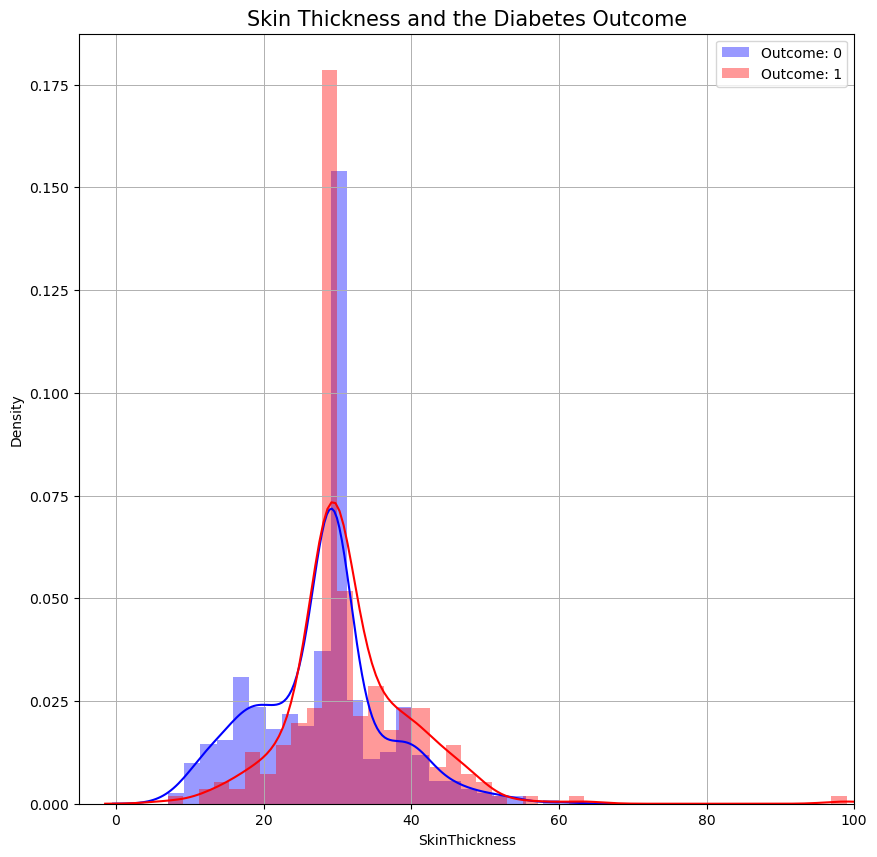

In [104]:
plt.figure(figsize=(10,10))

sns.distplot(df[df['Outcome'] == 0]["SkinThickness"], color='blue', label = 'Outcome: 0') 
sns.distplot(df[df['Outcome'] == 1]["SkinThickness"], color='red', label = 'Outcome: 1')
plt.legend(['Outcome']) 

plt.title('Skin Thickness and the Diabetes Outcome', fontsize=15)
plt.xlim([-5,100])
plt.grid(linewidth = 0.7)

plt.legend()

plt.show()

Based on the histogram above, the distribution of cases are in the range of 20-40 skin thickness with ~30 being the highest for both outcomes. Further observation shows that cases with diabetes (red) tends to have thicker skin as it increases in frequency with skin thickness and skewed normally to the right compare to cases with no diabetes(blue) which concentrates more on thinner and normal skin thickness as it descreases in frequency with thicker skin and skewed normally to the left.

Text(0.5, 1.0, 'Distribution of SkinThickness with glucose and Diabetes outcome')

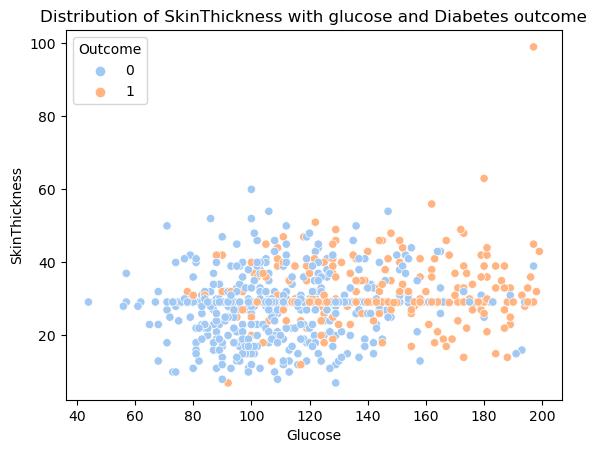

In [105]:
sns.scatterplot(data = df, x = 'Glucose', y='SkinThickness', hue = 'Outcome', palette = 'pastel')
plt.title("Distribution of SkinThickness with glucose and Diabetes outcome")

Based on the scatter plot, the distribution of cases with diabetes lies within the higher glucose level compare to cases without diabetes. On the other hand, there are no significant different based on skin thickness which mean the relationship between glucose and skin thickness might not have been strong.

## 4. Diabetes prediction using random forest classifier

In [41]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)


In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [44]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7480314960629921


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[134  28]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       162
           1       0.67      0.61      0.64        92

    accuracy                           0.75       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.74      0.75      0.75       254



In [47]:
print('Diabetes Prediction')

preg = input('Enter number of pregnancies: ')
gl = input('Enter glucose Level: ')
bp = input('Enter blood pressure: ')
sth = input('Enter skin thickness: ')
ins = input('Enter insulin level: ')
bmi = input('Enter BMI: ')
dpf = input('Enter diabetes pedigree function: ')
age = input('Enter age: ')

new_pred = [[preg, gl, bp, sth, ins, bmi, dpf, age]]
predicted_d = rfc.predict(new_pred)[0]


print(f'Predicted Diabetes: {predicted_d}')

Diabetes Prediction
Enter number of pregnancies: 4
Enter glucose Level: 145
Enter blood pressure: 34
Enter skin thickness: 34
Enter insulin level: 34
Enter BMI: 44
Enter diabetes pedigree function: 0.9
Enter age: 34
Predicted Diabetes: 1


## 5. Writeup of the analysis

The analysis begins with a question of what is the common factor to a positive diagnosis of diabetes. By utilising the clinical diabetes dataset, the analysis begins with the pre-processing stage to look for missing value, fill up any missing value and feature analysis. The feature analysis starts with correlation analysis result into the hypothesis that glucose might have been the best indicator for diabetes diagnosis, this further supported by conducting feature significance using Random Forest Classifier where glucose remains the most significant.The analysis begins with visualization with glucose as the main factor and whether there are relationships between other attributes and what is its outcome. Various visualization has been generated from the datasets. While some attributes shows no significant relationship with glucose (pregnancies, BP and skin thickness), the visualization of other attributes shows an inclination towards glucose being the main factor for diabetes. Finally, the analysis concludes with a prediction using the Random Forest Classifier algorithm in order to give diagnosis whether patient's are positive of diabetes or negative by manipulating various parameters. 